
# 📊 Visualization Tutorial with Matplotlib & Seaborn


This tutorial is on **typography & visualization** and introduces two of the most widely used Python libraries for data visualization.

---


In [2]:
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns


# Introduction
---

### 🎨 What is Matplotlib?

* **Matplotlib** is the **foundational plotting library** in Python.
* It provides **fine-grained control** over every aspect of a figure: axes, ticks, labels, colors, line styles, legends, and more.
* It is extremely **flexible** but often requires **more code** for simple tasks.
* Think of it as the **“engine”** behind most Python plots.
* ⚡ In energy analytics: use it when you need **customized plots** for reports or dashboards.

---

### 📈 What is Seaborn?

* **Seaborn** is built **on top of Matplotlib**, offering a **higher-level interface** with **beautiful defaults**.
* It is designed for **statistical visualization** and integrates smoothly with **Pandas DataFrames**.
* With just one line of code, you can create **attractive histograms, scatterplots, boxplots, heatmaps, regression plots, etc.**
* ⚡ In energy analytics: great for **quick exploration** of demand, weather, and correlations without much code.

---

#### 🔎 Key Difference

* **Matplotlib** → full control, more detailed coding, suitable for **final polished plots**.
* **Seaborn** → cleaner, faster, and visually appealing by default, best for **exploratory data analysis (EDA)**.

In [5]:
# Example data
df = pd.DataFrame({
    "time": pd.date_range("2022-01-01", periods=24, freq="h"),
    "demand": [800,820,850,870,900,950,1000,1200,1400,1600,1700,1750,
               1800,1780,1700,1600,1500,1400,1300,1200,1100,1000,900,850]
})


#  📈 Line Plots

A **line plot** connects data points with lines, making it the most common way to visualize **time series data**.

---

#### 🔎 Why use line plots?

* Show **trends over time** (upward, downward, seasonal).
* Highlight **patterns** such as daily cycles, weekly repetition, or long-term growth/decline.
* Make it easy to compare **multiple series** on the same timeline (e.g., Solar vs Wind vs Hydro).

---

#### ⚡ Energy Example

* Plotting **hourly electricity demand** across a day shows **morning/evening peaks**.
* Comparing **two weeks stacked** reveals how weekdays look alike.
* Adding **forecast vs actual** curves helps evaluate model performance.

---

#### ✅ Key Tips

* Always label axes.
* Use legends when comparing multiple lines.
* Add gridlines for readability.
* Keep line colors and styles distinct if plotting more than one series.

---

👉 Line plots are the **default tool** for time-based energy data and should always be part of EDA.


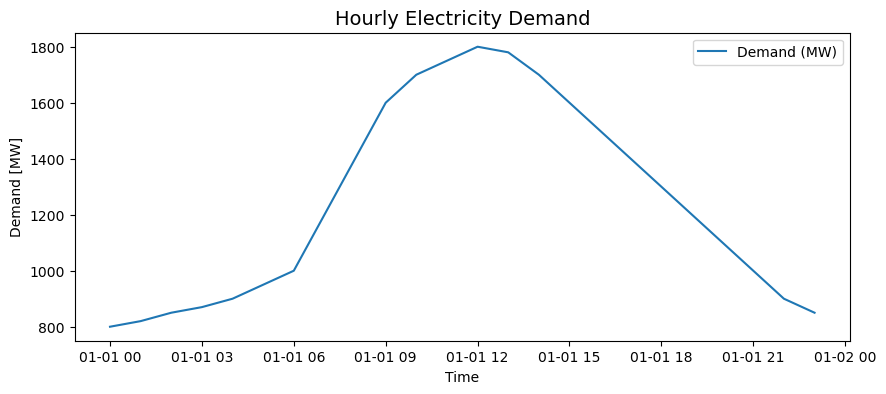

In [6]:
plt.figure(figsize=(10,4))
plt.plot(df["time"], df["demand"], label="Demand (MW)")
plt.title("Hourly Electricity Demand", fontsize=14)
plt.xlabel("Time")
plt.ylabel("Demand [MW]")
plt.legend()
plt.show()

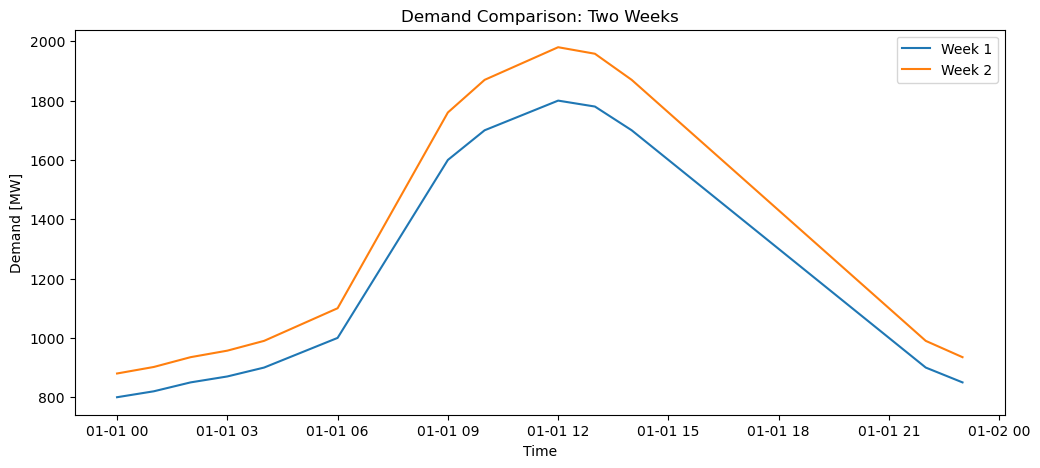

In [23]:
plt.figure(figsize=(12,5))
sns.lineplot(x=df["time"], y=df["demand"], label="Week 1")
sns.lineplot(x=df["time"], y=df["demand"]*1.1, label="Week 2")  # mock second week
plt.title("Demand Comparison: Two Weeks")
plt.xlabel("Time")
plt.ylabel("Demand [MW]")
plt.legend()
plt.show()

# 📊 Bar Plots (Categorical Data)

A **bar plot** displays data using rectangular bars, where the **length of each bar** represents the value of a category.
It’s best for **comparing discrete groups**.

---

#### 🔎 Why use bar plots?

* Compare **categories** (e.g., production by energy source).
* Show **distribution of totals** (e.g., demand by region).
* Easy to see **which category dominates**.

---

#### ⚡ Energy Example

* Compare how much electricity is produced from **Solar, Wind, and Hydro**.
* Show **regional demand** (North vs South vs East vs West).
* Display **installed capacity** by technology.

---


#### ✅ Key Tips

* Use **vertical bars** for simple category names (e.g., Solar, Wind).
* Use **horizontal bars** for long labels (e.g., “North-East Interconnection Zone”).
* Sort categories for clarity (e.g., highest to lowest).
* Always label axes and use units (`MWh`, `MW`).

---

👉 Horizontal bar plots are especially useful when **category names are long** or when you want to emphasize ranking.


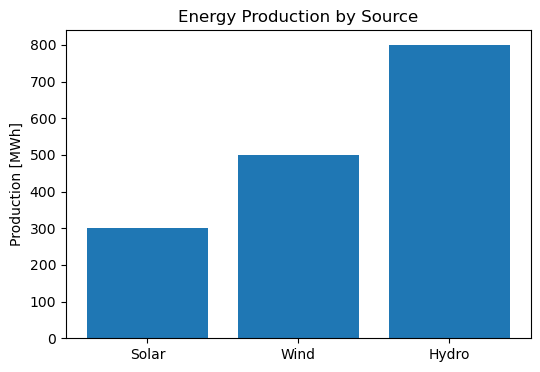

In [9]:
sources = ["Solar","Wind","Hydro"]
production = [300, 500, 800]

plt.figure(figsize=(6,4))
plt.bar(sources, production)
plt.title("Energy Production by Source")
plt.ylabel("Production [MWh]")
plt.show()

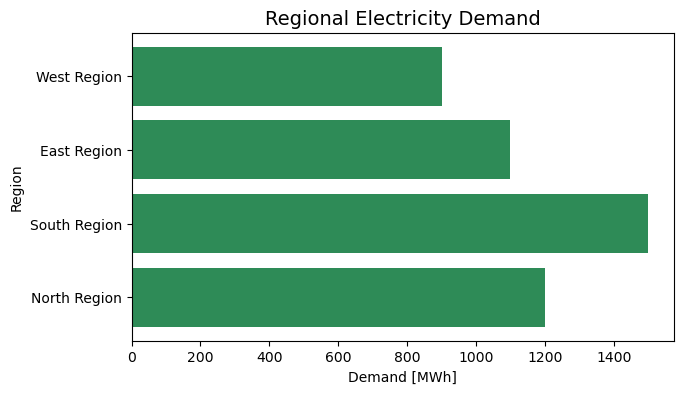

In [11]:
regions = ["North Region", "South Region", "East Region", "West Region"]
demand = [1200, 1500, 1100, 900]  # MWh

plt.figure(figsize=(7,4))
plt.barh(regions, demand, color="seagreen")
plt.title("Regional Electricity Demand", fontsize=14)
plt.xlabel("Demand [MWh]")
plt.ylabel("Region")
plt.show()



---

# 📊 Histogram & KDE (Kernel Density Estimate)

A **histogram** shows the **distribution** of data by splitting values into **bins** (intervals) and counting how many observations fall into each bin.
A **KDE (Kernel Density Estimate)** is a smoothed curve that approximates the distribution.

---

#### 🔎 Why use them?

* Understand the **shape of the data** (normal, skewed, multimodal).
* Spot **common ranges** and **rare values**.
* Compare distributions between groups (e.g., demand in winter vs summer).

---

#### ⚡ Energy Example

* Histogram of **hourly demand** shows which demand levels are most frequent.
* Adding KDE gives a **smooth curve**, making it easier to see peaks and spread.

---

#### ✅ How to Read a Histogram + KDE

* **X-axis** → the values (e.g., demand in MW).
* **Y-axis** → how often those values occur (frequency or density).
* **Histogram bars** → show counts in each bin.
* **KDE curve** → smoothed shape of the distribution.
* **Interpretation:**

  * Tall bars / peaks → demand levels that occur often.
  * Wide spread → high variability.
  * Multiple peaks → different operating regimes (e.g., weekdays vs weekends).

---

👉 Together, **histograms + KDEs** help you quickly see whether demand is stable, variable, or follows multiple patterns.


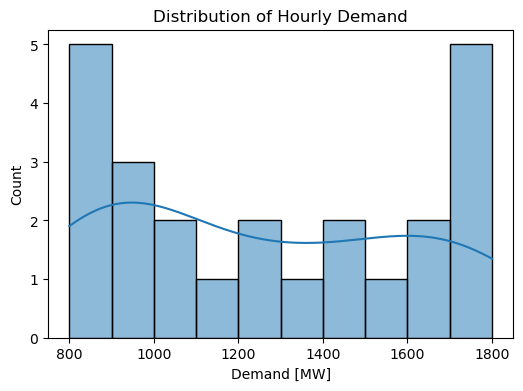

In [12]:
plt.figure(figsize=(6,4))
sns.histplot(df["demand"], kde=True, bins=10)
plt.title("Distribution of Hourly Demand")
plt.xlabel("Demand [MW]")
plt.show()


---

## 🌞❄️ Comparing Distributions: Summer vs Winter Demand

Sometimes we want to compare how distributions differ between groups.
With Seaborn, we can add a **`hue`** argument to separate categories (e.g., summer vs winter).

---

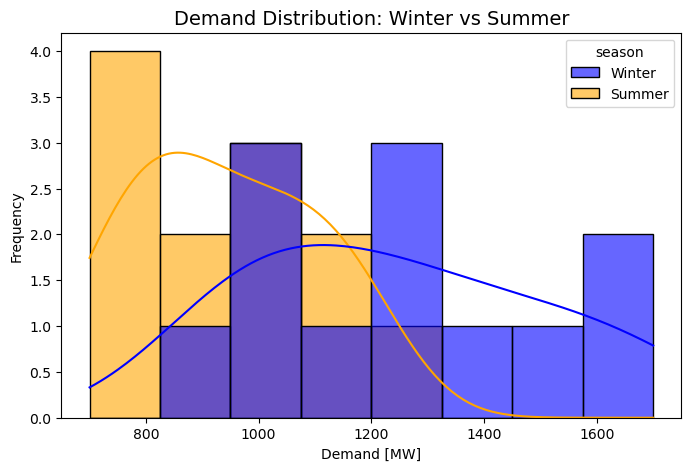

In [18]:
# Example dataset: hourly demand with season labels
winter = [900,950,1000,1050,1100,1200,1250,1300,1400,1500,1600,1700]
summer = [700,750,800,820,850,900,950,1000,1050,1100,1150,1200]

df = pd.DataFrame({
    "demand": winter + summer,
    "season": ["Winter"]*len(winter) + ["Summer"]*len(summer)
})

plt.figure(figsize=(8,5))
sns.histplot(data=df, x="demand", hue="season", kde=True, bins=8, palette={"Winter":"blue", "Summer":"orange"}, alpha=0.6)
plt.title("Demand Distribution: Winter vs Summer", fontsize=14)
plt.xlabel("Demand [MW]")
plt.ylabel("Frequency")
plt.show()


### ✅ How to Read This Plot

* **Two distributions** → Winter (blue) vs Summer (orange).
* **Histogram bars** → show frequency of demand ranges for each season.
* **KDE curves** → smooth comparison of overall shape.
* **Interpretation:**

  * Winter demand is **shifted higher** (more heating).
  * Summer demand is **lower and flatter** (less heating, sometimes cooling).
---

👉 Using `hue` makes comparisons very intuitive — you can clearly see **seasonal shifts** in demand patterns.


# 🔵 Scatter Plots

A **scatter plot** shows the relationship between two variables by plotting individual data points.
By adding **color (hue), size, or style**, we can visualize more dimensions of the data.

---

#### 🔎 Why use scatter plots?

* Explore **relationships** between demand and external factors (temperature, wind, solar radiation).
* Detect **non-linear effects** (e.g., U-shape demand vs temperature).
* Spot **outliers** and special cases (holidays, anomalies).
* Add a third variable via **color or size** to see interactions.

---

#### ✅ Key Tips for Scatter Plots

* Use **alpha < 1** to reduce overplotting when you have thousands of points.
* Use **hue** for categorical separation (weekday, season, holiday).
* Use **size** or **style** for additional dimensions (e.g., wind speed, holiday flag).
* Always check if the relationship looks **linear or non-linear** before choosing a model.

---

👉 Scatter plots are **the workhorse of EDA** in energy demand analysis: they reveal **hidden drivers** and guide **feature engineering**.

---



## Examples
#### Demand vs Temperature (U-shape: heating & cooling)

**Idea:** Demand rises when it’s very cold (heating) and again when it’s very hot (cooling).

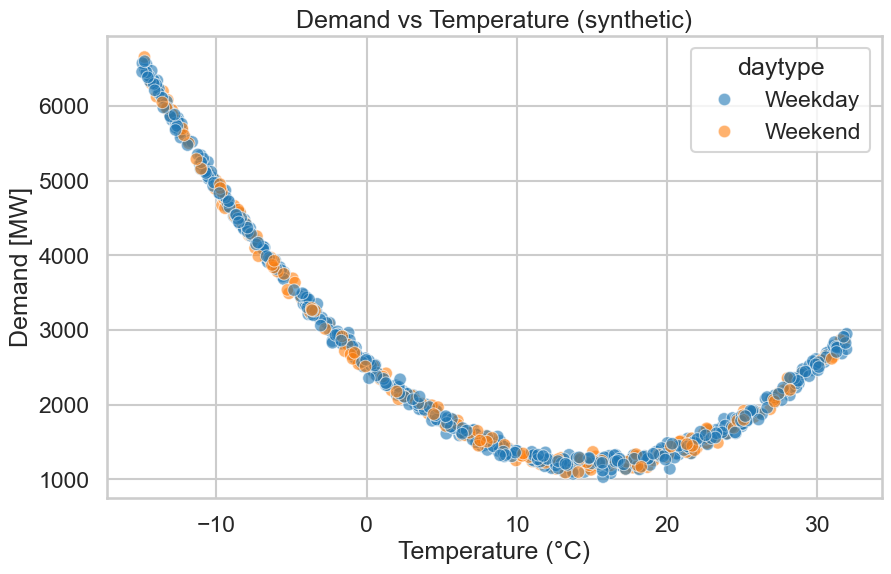

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rng = np.random.default_rng(42)
n = 800

temp = rng.uniform(-15, 32, size=n)  # °C
# U-shape: quadratic around ~15°C comfort zone
demand = 1200 + 6*(temp-15)**2 + rng.normal(0, 60, size=n)

# Add weekday/weekend label for hue
weekday = rng.choice(["Weekday","Weekend"], size=n, p=[0.7, 0.3])

df1 = pd.DataFrame({"temp": temp, "demand": demand, "daytype": weekday})

plt.figure(figsize=(10,6))
sns.scatterplot(data=df1, x="temp", y="demand", hue="daytype", alpha=0.6)
plt.title("Demand vs Temperature (synthetic)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Demand [MW]")
plt.show()

---

#### Wind Speed vs Wind Generation (saturation curve)

**Idea:** Power grows \~cubic at low speeds and saturates near rated output.

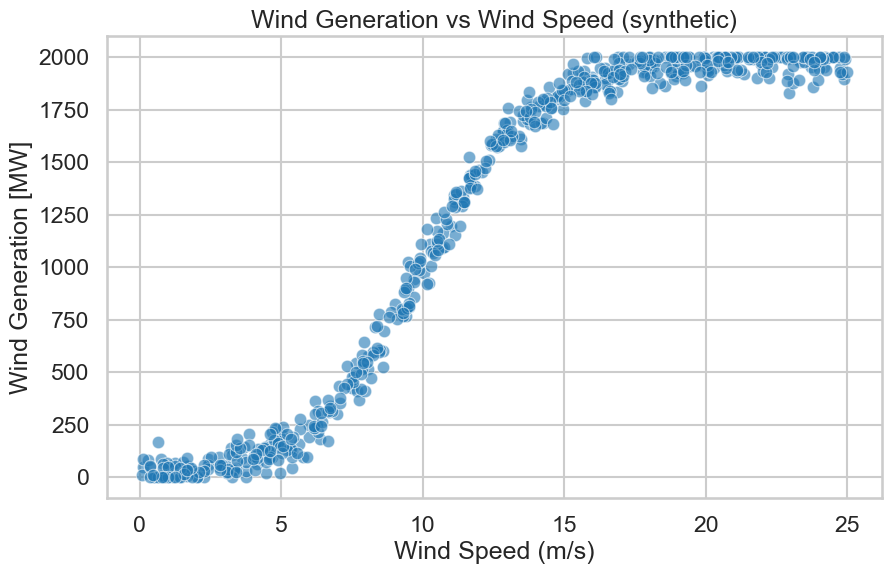

In [37]:
rng = np.random.default_rng(7)
n = 600

wind = rng.uniform(0, 25, size=n)  # m/s
# Logistic-like saturation
rated = 2000  # MW
gen = rated / (1 + np.exp(-(wind-10)/2)) + rng.normal(0, 60, size=n)
gen = np.clip(gen, 0, rated)

df2 = pd.DataFrame({"wind_speed": wind, "wind_gen": gen})

plt.figure(figsize=(10,6))
sns.scatterplot(data=df2, x="wind_speed", y="wind_gen", alpha=0.6)
plt.title("Wind Generation vs Wind Speed (synthetic)")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Wind Generation [MW]")
plt.show()

#### Hourly Load Profile by Day Type (color by weekday/weekend)

**Idea:** Morning/evening peaks on weekdays; flatter/lower on weekends.

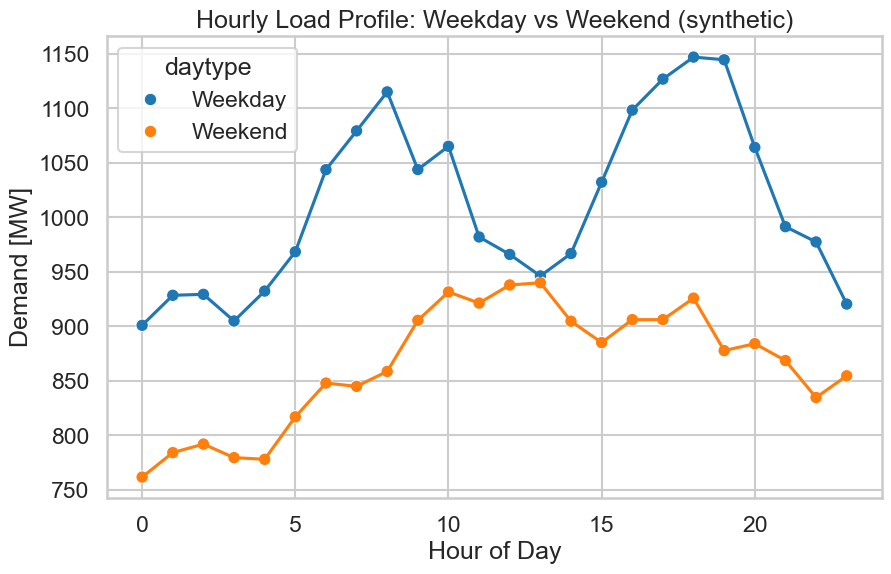

In [39]:
rng = np.random.default_rng(11)
hours = np.arange(24)

# Weekday pattern: morning/evening peaks
wk = 900 + 200*np.exp(-0.5*((hours-8)/2.2)**2) + 250*np.exp(-0.5*((hours-18)/2.5)**2)
wk += rng.normal(0, 20, size=24)

# Weekend pattern: lower & flatter
we = 800 + 120*np.exp(-0.5*((hours-11)/3.0)**2) + 100*np.exp(-0.5*((hours-19)/3.5)**2)
we += rng.normal(0, 20, size=24)

df4 = pd.DataFrame({
    "hour": np.tile(hours, 2),
    "demand": np.r_[wk, we],
    "daytype": np.repeat(["Weekday","Weekend"], 24)
})

plt.figure(figsize=(10,6))
sns.scatterplot(data=df4, x="hour", y="demand", hue="daytype", s=80)
sns.lineplot(data=df4, x="hour", y="demand", hue="daytype", legend=False)
plt.title("Hourly Load Profile: Weekday vs Weekend (synthetic)")
plt.xlabel("Hour of Day")
plt.ylabel("Demand [MW]")
plt.show()


#### Price vs Demand (with heteroskedastic noise)

**Idea:** Higher demand often correlates with higher prices, with variance increasing at peaks.

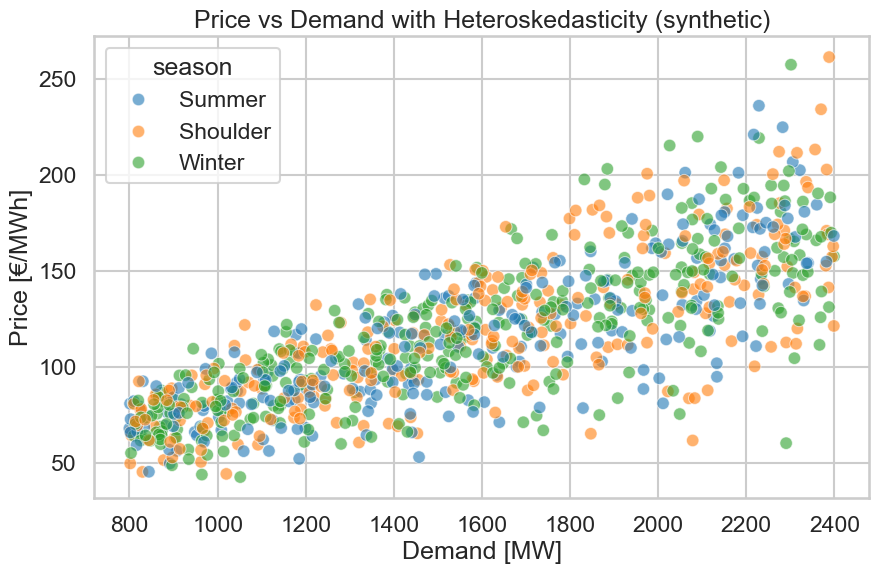

In [40]:
rng = np.random.default_rng(5)
n = 900

demand = rng.uniform(800, 2400, size=n)
# Price increases with demand; volatility grows at higher demand
price = 20 + 0.06*demand + rng.normal(0, 0.015*demand, size=n)

season = rng.choice(["Winter","Shoulder","Summer"], size=n, p=[0.4, 0.3, 0.3])
df5 = pd.DataFrame({"demand": demand, "price": price, "season": season})

plt.figure(figsize=(10,6))
sns.scatterplot(data=df5, x="demand", y="price", hue="season", alpha=0.6)
plt.title("Price vs Demand with Heteroskedasticity (synthetic)")
plt.xlabel("Demand [MW]")
plt.ylabel("Price [€/MWh]")
plt.show()

#### Demand vs Temperature by Season (facets)

**Idea:** Same demand–temperature relationship, but visualized per season.

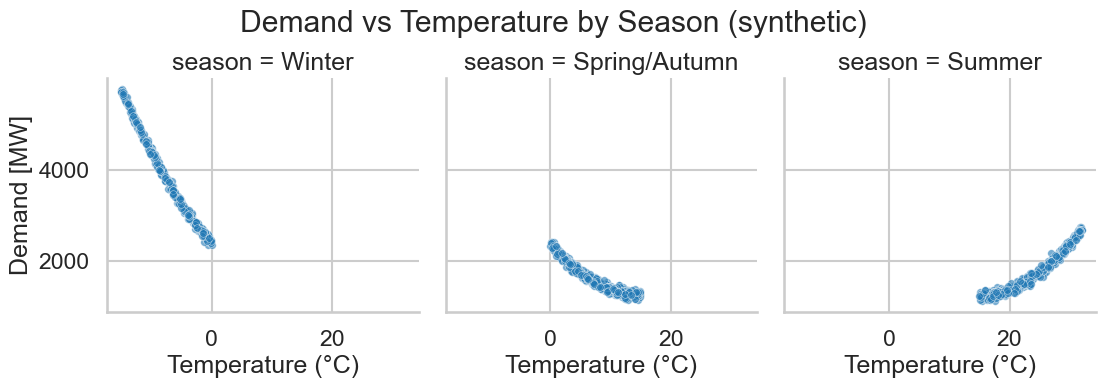

In [41]:
rng = np.random.default_rng(17)
n = 1200
temp = rng.uniform(-15, 32, size=n)
season = pd.cut(temp, bins=[-50,0,15,50], labels=["Winter","Spring/Autumn","Summer"])

demand = 1250 + 5*(temp-15)**2 + rng.normal(0, 55, size=n)
df6 = pd.DataFrame({"temp": temp, "demand": demand, "season": season})

g = sns.FacetGrid(df6, col="season", col_wrap=3, height=3.8, sharex=True, sharey=True)
g.map_dataframe(sns.scatterplot, x="temp", y="demand", alpha=0.6, s=30)
g.set_axis_labels("Temperature (°C)", "Demand [MW]")
g.fig.suptitle("Demand vs Temperature by Season (synthetic)", y=1.04)
plt.show()

## 🔴 Scatterplot with Regression Line

A **scatterplot** shows the relationship between two variables.
Adding a **regression line** helps visualize the underlying trend.

---

#### 🔎 Why use scatterplots with regression?

* Identify **linear or non-linear relationships**.
* Spot **clusters or outliers**.
* Check if one variable can help **predict** another.

---

#### ⚡ Energy Example

* **Demand vs Temperature**: colder or hotter days often increase demand (heating/cooling).
* **Wind speed vs Wind generation**: higher wind speeds usually increase output, up to turbine limits.
* **Solar radiation vs PV production**: positive correlation until saturation.

---

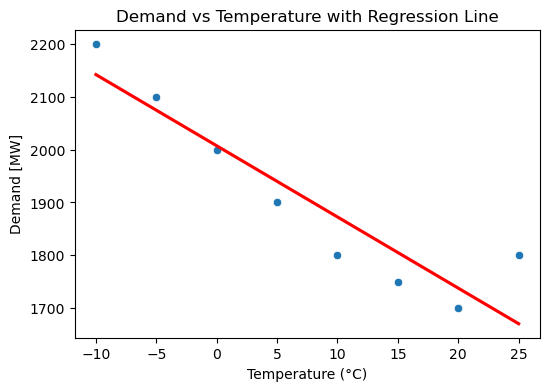

In [19]:
weather = pd.DataFrame({
    "temp": [-10,-5,0,5,10,15,20,25],
    "demand": [2200,2100,2000,1900,1800,1750,1700,1800]
})

plt.figure(figsize=(6,4))
sns.scatterplot(x="temp", y="demand", data=weather)
sns.regplot(x="temp", y="demand", data=weather, ci=None, scatter=False, color="red")
plt.title("Demand vs Temperature with Regression Line")
plt.xlabel("Temperature (°C)")
plt.ylabel("Demand [MW]")
plt.show()

#### ✅ How to Read It

* **Dots** = actual observations.
* **Red line** = best-fit linear regression line.
* If the dots closely follow the line → strong linear correlation.
* If the dots curve away → relationship may be **non-linear** (e.g., U-shape for temperature vs demand).

---

👉 Scatterplots with regression are essential for **feature selection** in modeling: they help you see which variables have predictive power.


# 📦 Boxplots

A **boxplot** (also called a whisker plot) summarizes the **distribution** of a dataset.
It highlights the **median, spread, and potential outliers**.

---

#### 🔎 Why use boxplots?

* Compare distributions across **categories** (e.g., Solar vs Wind vs Hydro).
* Show **central tendency** (median).
* Reveal **spread** (interquartile range).
* Detect **outliers** (points far from the rest).

---

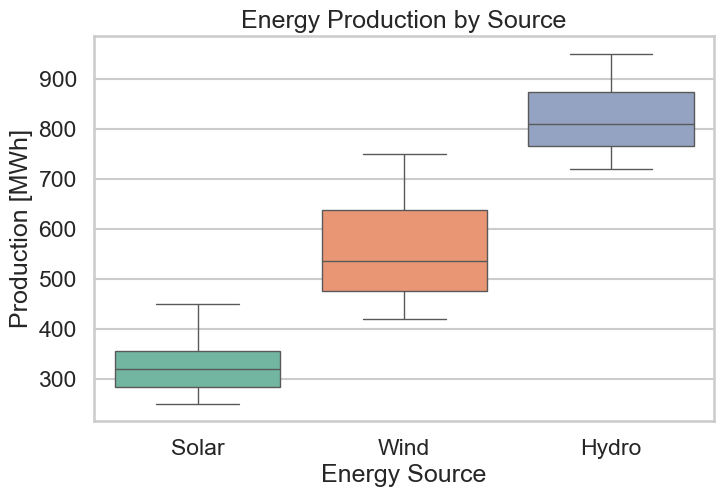

In [31]:
sources = ["Solar"]*10 + ["Wind"]*10 + ["Hydro"]*10
production = [
    # Solar: centered ~300, but variable with a couple of high/low outliers
    250, 270, 280, 290, 310, 330, 340, 360, 400, 450,
    
    # Wind: centered ~500, wider variability
    420, 450, 470, 490, 520, 550, 600, 650, 700, 750,
    
    # Hydro: centered ~800, relatively stable but with spread
    720, 740, 760, 780, 800, 820, 850, 880, 920, 950
]
df_prod = pd.DataFrame({"Source": sources, "Production": production})

plt.figure(figsize=(8,5))
sns.boxplot(x="Source", y="Production", data=df_prod, hue="Source", palette="Set2", legend=False)
plt.title("Energy Production by Source")
plt.xlabel("Energy Source")
plt.ylabel("Production [MWh]")
plt.show()


#### ✅ How to Read a Boxplot

Each box shows the distribution for one energy source:

* **Center line** → the **median** (50th percentile).
* **Box edges** → 25th and 75th percentiles (interquartile range, IQR).
* **Whiskers** → extend to the smallest/largest values within 1.5 × IQR.
* **Dots (if any)** → outliers, unusually high or low values.

---
#### 📊 Interpretation (with spread & variability)

* **Solar** → centered around \~300 MWh but with **large spread**; some days drop as low as 250, others spike above 400–450 → shows intermittent, weather-dependent output.
* **Wind** → centered \~500 MWh but with **very wide variability** (420–750). This reflects how wind conditions can swing output significantly.
* **Hydro** → centered around \~800 MWh, generally **more stable**, but still shows a noticeable range (720–950), with a few high production days.

---

👉 Boxplots are great when you want to **compare multiple categories side by side** — they compress a lot of distribution information into a simple graphic.

---

# 🎻 Violin Plots

A **violin plot** combines the ideas of a **boxplot** and a **density plot**.
It shows the **distribution shape** of the data, not just summary statistics.

---

#### 🔎 Why use violin plots?

* Visualize the **full distribution** (not just median & quartiles).
* See **whether data is symmetric, skewed, or multimodal** (multiple peaks).
* Compare the **spread and shape** of categories side by side.

---

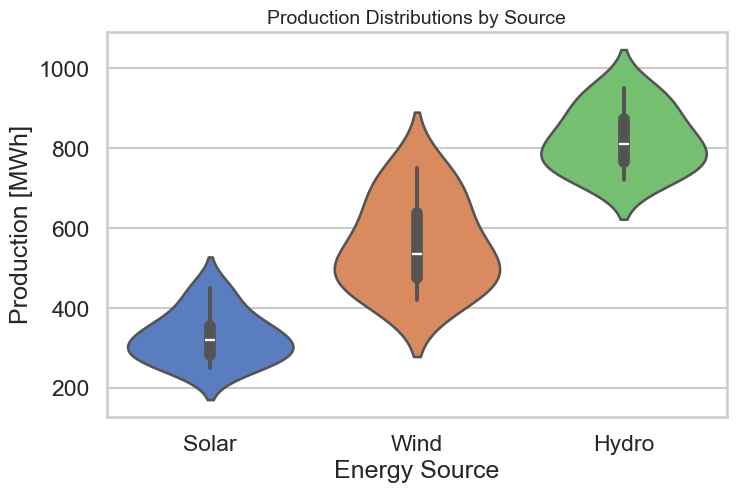

In [34]:

plt.figure(figsize=(8,5))
sns.violinplot(
    x="Source", y="Production", data=df_prod,
    hue="Source", palette="muted", legend=False
)
plt.title("Production Distributions by Source", fontsize=14)
plt.xlabel("Energy Source")
plt.ylabel("Production [MWh]")
plt.show()




#### ✅ How to Read a Violin Plot

* **Width of the violin** → how frequent values are at that level.
* **Thin sections** → rare values.
* **Thick sections** → common values.
* **Center line** → median (like in boxplot).
* **White box inside** → interquartile range (25–75%).

---

#### 📊 Interpretation (with more spread & variability)

* **Solar** → violin is **wide at multiple levels**, showing many operating ranges (from \~250 up to \~400+). This reflects strong day-to-day fluctuations in solar production.
* **Wind** → violin is **very tall and variable**, stretching from \~420 to \~750. The wide belly around \~500–600 shows the most common operating range, but long tails indicate occasional extreme highs/lows.
* **Hydro** → violin is **narrower**, concentrated around \~800 MWh, but still spreads up to \~950. This suggests **relative stability** compared to solar and wind.

---

👉 Violin plots are useful when you want to **see the full shape of the distribution**, not just averages — they tell the story of **variability and consistency** in energy sources.


# 🌡️💨  Heatmap (Correlations)

A **heatmap** is a visual way to represent the **correlation matrix** between variables.
Correlation values range from **-1 to +1**:

* **+1** → perfect positive correlation (as one increases, the other increases).
* **-1** → perfect negative correlation (as one increases, the other decreases).
* **0** → no linear relationship.

---


In [46]:
weather = pd.DataFrame({
    "demand":  [2000, 2100, 2200, 1900, 1800, 1700, 1600],
    "temp":    [-5, 0, 5, 10, 15, 20, 25],
    "wind":    [2, 3, 4, 5, 6, 4, 3],
    "humidity":[85, 80, 75, 70, 65, 60, 55],        # % (falls as temp rises)
    "solar":   [50, 100, 200, 400, 600, 750, 850],  # W/m² (rises with temp)
    "pressure":[1025, 1022, 1018, 1015, 1010, 1008, 1005] # hPa (slight decline)
})

In [48]:
weather.corr()

,demand,temp,wind,humidity,solar,pressure
demand,1.000000,-0.857143,-0.172062,0.857143,-0.916261,0.851216
temp,-0.857143,1.000000,0.401478,-1.000000,0.988598,-0.996546
wind,-0.172062,0.401478,1.000000,-0.401478,0.376156,-0.454865
humidity,0.857143,-1.000000,-0.401478,1.000000,-0.988598,0.996546
solar,-0.916261,0.988598,0.376156,-0.988598,1.000000,-0.988687
pressure,0.851216,-0.996546,-0.454865,0.996546,-0.988687,1.000000


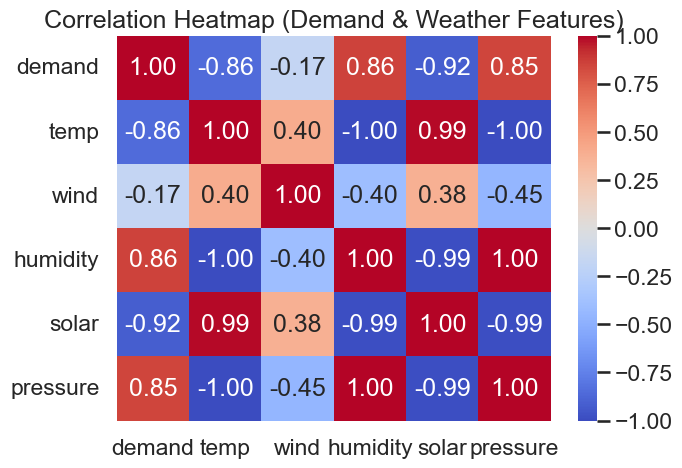

In [47]:
plt.figure(figsize=(7,5))
sns.heatmap(weather.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Demand & Weather Features)")
plt.show()

---

#### ✅ How to Read This Heatmap

* **Demand vs Temp = strong negative** → colder temps = higher demand (heating).
* **Demand vs Humidity = positive** → cold days (high humidity in winter) align with higher demand.
* **Demand vs Solar = negative** → more sunlight (often warmer days) = lower demand.
* **Temp vs Solar = positive** → sunny days tend to be warmer.
* **Temp vs Pressure = negative** → as temps rise, pressure tends to drop slightly.

---

# 🔗 Correlation Clustermap

A **clustermap** is like a heatmap, but it also performs **hierarchical clustering** of rows and columns.
This groups together variables that have **similar correlation patterns**, making it easier to spot clusters of related features.


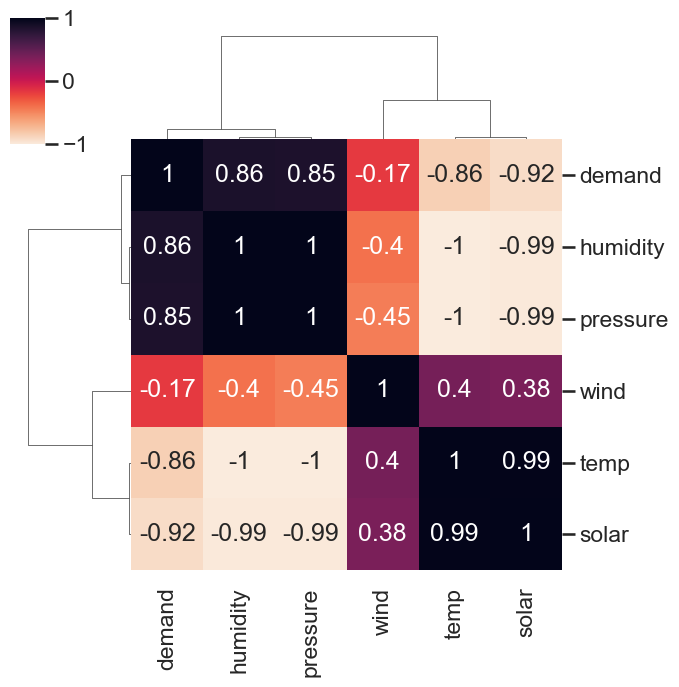

In [51]:
sns.clustermap(
    weather.corr(),
    cmap="rocket_r",   # reversed "rocket" color palette
    annot=True,
    figsize=(7,7)
);

---

#### ✅ How to Read a Clustermap

* **Color scale** works just like a heatmap → red/orange = high correlation, dark = low/negative.
* **Dendrograms** (the tree-like structures) show how features group together:

  * Variables in the same branch are **more correlated** with each other.
* In our example:

  * **Temp, Solar, and Pressure** might cluster together (all related to seasonal/weather cycles).
  * **Demand and Humidity** might cluster, since both peak on colder days.
  * **Wind** may form its own branch if it behaves differently.

---

👉 Compared to a plain heatmap, a **clustermap automatically organizes features**, which is especially useful when you have **many variables** (e.g., dozens of weather and demand drivers).


# 🔄 Pairplot (Scatter Matrix)

A **pairplot** (also called a scatter matrix) shows the relationships between **all pairs of variables** in a dataset.
It combines multiple **scatterplots** into a grid, with histograms or KDE plots on the diagonal.

---

### 🔎 Why use pairplots?

* Explore **all variable relationships at once**.
* Spot **strong correlations** and **non-linear patterns**.
* Detect **clusters** or groups (e.g., weekdays vs weekends, seasons).
* Quick overview before running models or feature selection.

---

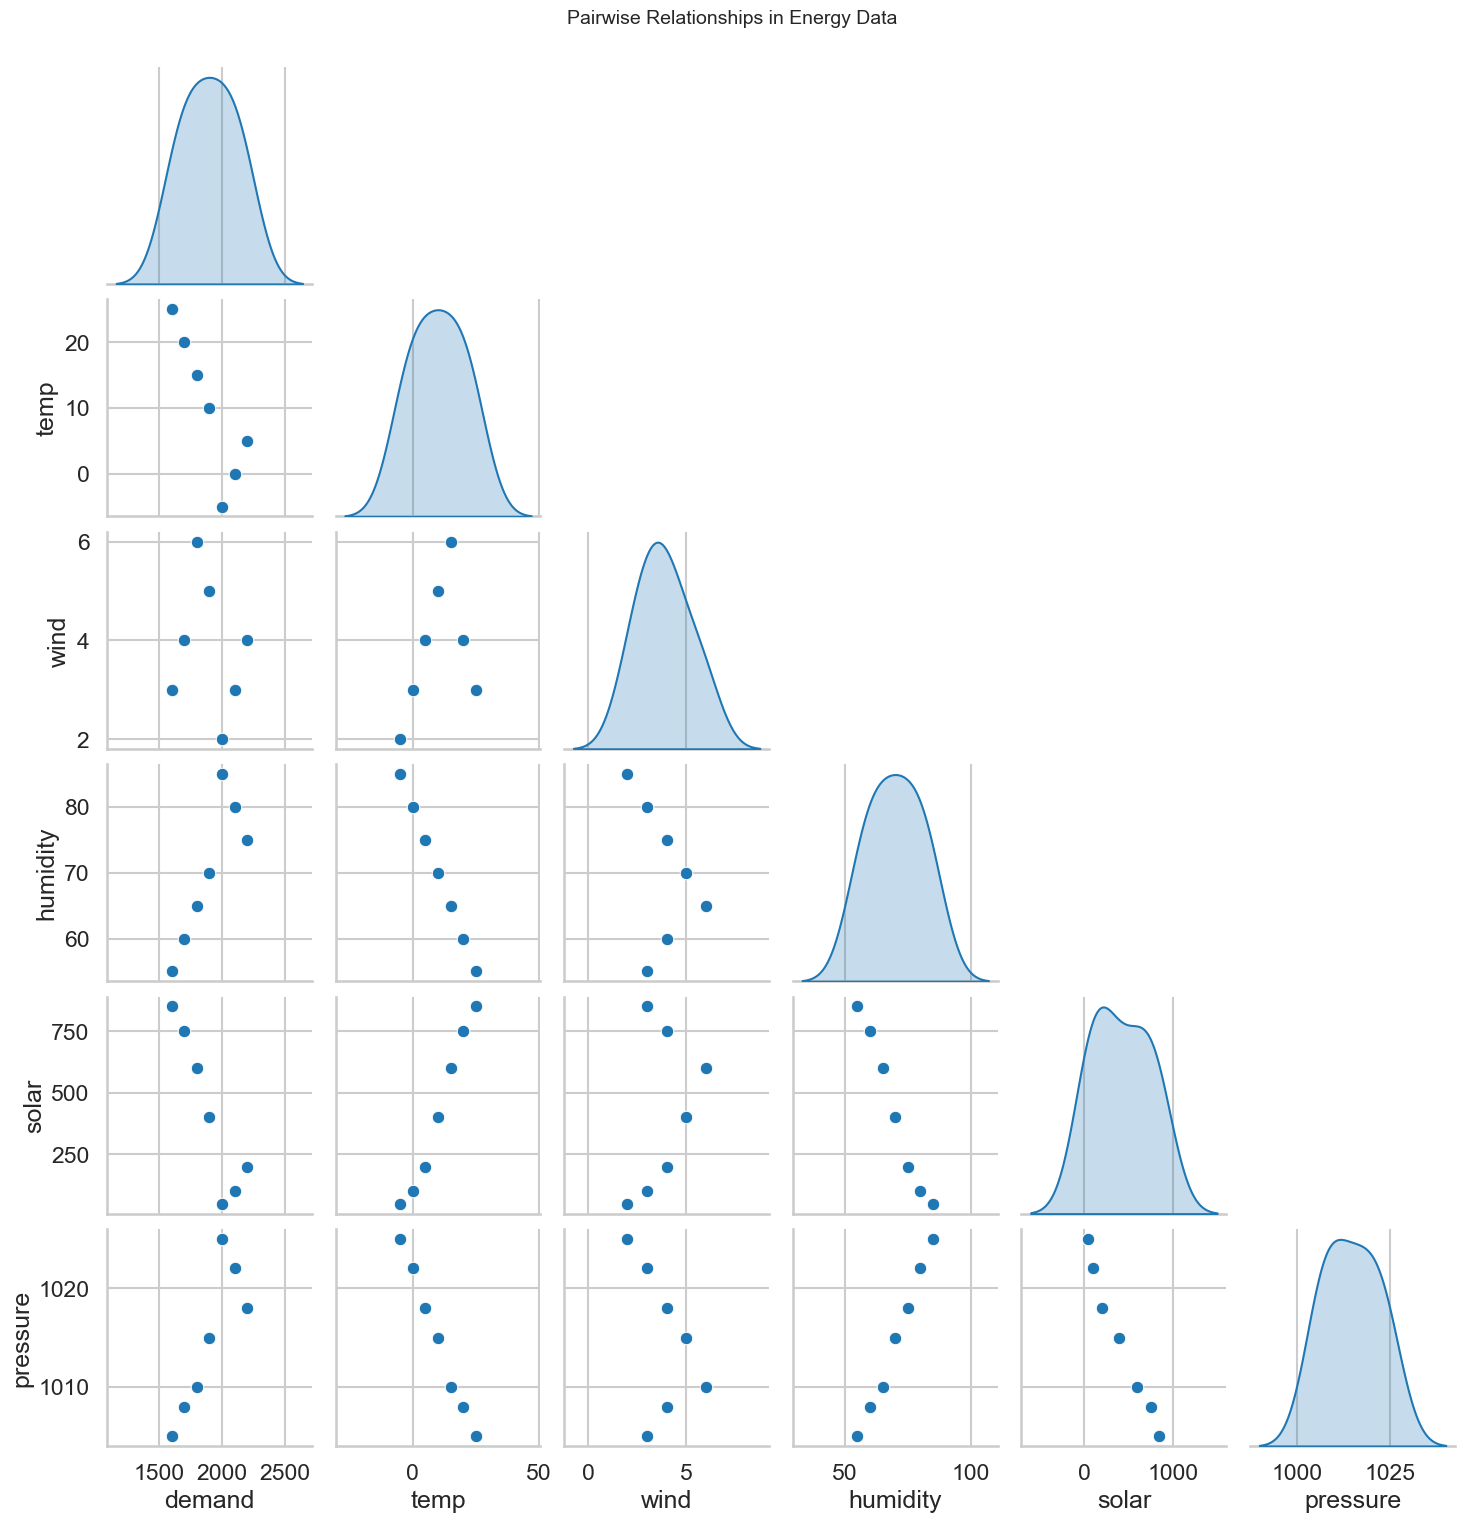

In [53]:
sns.pairplot(weather, diag_kind="kde", corner=True)
plt.suptitle("Pairwise Relationships in Energy Data", y=1.02, fontsize=14)
plt.show()

---

#### ✅ How to Read a Pairplot

* Each **scatterplot** = relationship between two variables.

  * Example: **Demand vs Temp** → negative trend (colder → higher demand).
  * Example: **Solar vs Temp** → positive trend (warmer → sunnier).
* **Diagonal plots** = distribution of each variable (histogram or KDE).
* **Clusters/outliers** show up as groups or isolated points.

---

👉 Pairplots are especially useful at the **start of EDA** to see how demand relates to multiple weather features before building models.


# Customizing Colors, Sizes, and Titles

## Matplotlib: Line styles, markers, title, grid

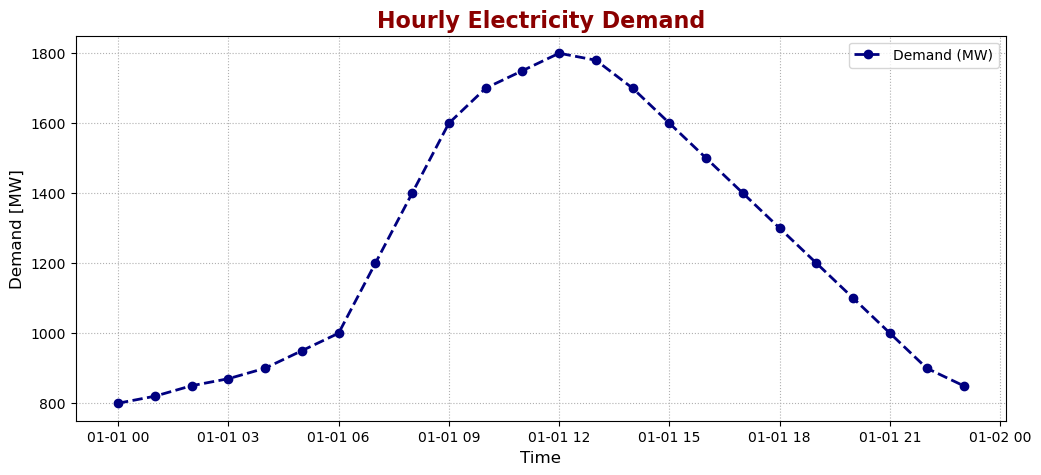

In [24]:
plt.figure(figsize=(12,5))
plt.plot(df["time"], df["demand"], color="navy", linewidth=2, linestyle="--", marker="o", label="Demand (MW)")
plt.title("Hourly Electricity Demand", fontsize=16, fontweight="bold", color="darkred")
plt.xlabel("Time", fontsize=12)
plt.ylabel("Demand [MW]", fontsize=12)
plt.legend()
plt.grid(True, linestyle=":")
plt.show()

## Seaborn: Palettes and context

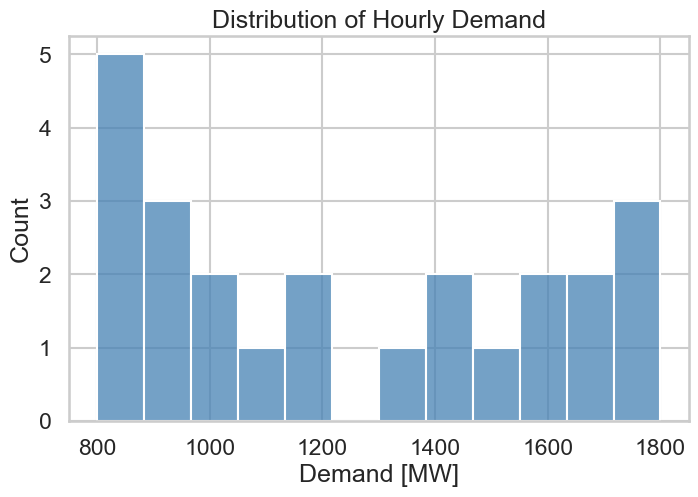

In [25]:
# Global style and context
sns.set_style("whitegrid")    # options: darkgrid, whitegrid, dark, white, ticks
sns.set_context("talk")       # options: paper, notebook, talk, poster

plt.figure(figsize=(8,5))
sns.histplot(df["demand"], bins=12, color="steelblue")
plt.title("Distribution of Hourly Demand")
plt.xlabel("Demand [MW]")
plt.show()


# Summary

- **Matplotlib** → full control; more verbose.  
- **Seaborn** → nicer defaults; quick statistical plots.  
- Customize **colors, sizes, titles, and styles** to improve clarity.  
- Use advanced plots (box/violin/heatmap/pairplot) to reveal patterns in energy data.
